In [127]:
import numpy as np
import pandas as pd
from inference import inf_model, policy
from miss_fill.context_fill import cluster_fill, KNN_fill, DR_fill
from miss_fill.mean_fill import mean_fill, tr_mean_fill

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In this note book we create a way to calculate the next treatment. It will help us to figure out if after filling the missing value, it selects the same treatment as in the original data frame. Here, the inference model for the thompson sampling is same as the adaptive_n_of_1 we used for the data simulation.

### Data

In [86]:
df1 = pd.read_csv('data/two_treatment/dt0_without_context.csv' ,index_col=0)
df1.head()

,t,patient_id,treatment,outcome
0,0,0,0,0.125730
1,1,0,0,-0.132105
2,2,0,0,0.640423
3,3,0,0,0.104900
4,4,0,0,-0.535669


#### creating random nan values

In [ ]:
df = df1.copy()
column = 'outcome'
nan_fraction = 0.1  # 10% of the data in column B will be set to NaN

total_rows = len(df)
nan_count = int(total_rows * nan_fraction)

# seed for reproducibility
np.random.seed(0)
nan_indices = np.random.choice(df.index, nan_count, replace=False)

# Set those randomly selected positions to NaN in the specified column
df.loc[nan_indices, column] = np.nan


In [88]:
## seperating the dataframe at the point of first missing value
nan_t = df[df.isna().any(axis=1)]['t']
nan_t = nan_t.sort_values(ascending=True).unique() ## shorting the value in ascending order to make sure we dot the first time cycle
ts = nan_t[0]
dt = df[df['t'] <= ts].copy()
dt.head()

,t,patient_id,treatment,outcome
0,0,0,0,0.125730
30,0,1,0,NaN
60,0,2,0,0.189053
90,0,3,0,2.040919
120,0,4,0,-0.651791


Here, the simulation design has the a block length of 5, thus, we fill the missing value for one block and then create the simulation. 

### making simulation for the next action choice 

In [ ]:
# Policy and Inference Model
inference_model =  inf_model.NormalKnownVariance(
    
    prior_mean=0, prior_variance=1, variance=1
)
tmps = policy.ThompsonSampling(inference_model, number_of_treatments=2)

In [ ]:
## intialization for running all the methods
t= 
k = 3
N = 2
m = 1
lamb = 2
context_cols = ['treatment', 'patient_id']


In [179]:
## create a dictionary for all the methods

methods = {
    'mean_fill': mean_fill,
    'tr_mean_fill': tr_mean_fill,
    'KNN_fill': KNN_fill,
    'cluster_fill': cluster_fill,
    'DR_fill': DR_fill
}

In [ ]:
eva = Evaluatemethod(t,length, df1)

In [180]:
result = pd.DataFrame()
eva = Evaluatemethod()
for method_name, method in methods.items():
    if method == KNN_fill:
        filled_dt =method(dt, context_cols, k)
        for i in range(1,5):
            next_cycle = df[(df['t']> nan_t[i-1]) & (df['t'] <= nan_t[i])].copy()
            next_dt = pd.concat([filled_dt, next_cycle], axis= 0, ignore_index=False) # add the next cycle to the data
            next_dt = next_dt.sort_index()
            filled_dt = method(next_dt, context_cols, k)
        ## GET THE EVALUATION
        n_correct_tr, index = eva.get_result(filled_dt)
        result[f'{method_name}'] = n_correct_tr
    elif method == cluster_fill:
        filled_dt =method(dt, context_cols, N, m)
        for i in range(1,5):
            next_cycle = df[(df['t']> nan_t[i-1]) & (df['t'] <= nan_t[i])].copy()
            next_dt = pd.concat([filled_dt, next_cycle], axis= 0, ignore_index=False) # add the next cycle to the data
            next_dt = next_dt.sort_index()
            filled_dt = method(next_dt, context_cols, N, m)
        ## GET THE EVALUATION
        n_correct_tr, index = eva.get_result(filled_dt)
        result[f'{method_name}'] = n_correct_tr
    elif method == DR_fill:
        filled_dt =method(dt,lamb, context_cols)
        for i in range(1,5):
            next_cycle = df[(df['t']> nan_t[i-1]) & (df['t'] <= nan_t[i])].copy()
            next_dt = pd.concat([filled_dt, next_cycle], axis= 0, ignore_index=False) # add the next cycle to the data
            next_dt = next_dt.sort_index()
            filled_dt = method(next_dt, lamb, context_cols)
        ## GET THE EVALUATION
        n_correct_tr, index = eva.get_result(filled_dt)
        result[f'{method_name}'] = n_correct_tr
        
    elif method == DR_fill:
        filled_dt =method(dt,lamb, context_cols)
        for i in range(1,5):
            next_cycle = df[(df['t']> nan_t[i-1]) & (df['t'] <= nan_t[i])].copy()
            next_dt = pd.concat([filled_dt, next_cycle], axis= 0, ignore_index=False) # add the next cycle to the data
            next_dt = next_dt.sort_index()
            filled_dt = method(next_dt, lamb, context_cols)
        ## GET THE EVALUATION
        n_correct_tr, index = eva.get_result(filled_dt)
        result[f'{method_name}'] = n_correct_tr
    elif method == mean_fill:
        filled_dt_g =method(dt)
        for i in range(1,5):
            next_cycle_g = df[(df['t']> nan_t[i-1]) & (df['t'] <= nan_t[i])].copy()
            next_dt_g = pd.concat([filled_dt_g, next_cycle_g], axis= 0, ignore_index=False) # add the next cycle to the data
            next_dt_g = next_dt_g.sort_index()
            filled_dt_g = method(next_dt_g)
        ## GET THE EVALUATION
        n_correct_tr_g, index = eva.get_result(filled_dt= filled_dt_g)
        result[f'{method_name} (global)'] = n_correct_tr_g
        
        # for individual
        filled_dt =method(dt, method = 'individual')
        for i in range(1,5):
            next_cycle = df[(df['t']> nan_t[i-1]) & (df['t'] <= nan_t[i])].copy()
            next_dt = pd.concat([filled_dt, next_cycle], axis= 0, ignore_index=False) # add the next cycle to the data
            next_dt = next_dt.sort_index()
            filled_dt = method(next_dt, method = 'individual')
        ## GET THE EVALUATION
        n_correct_tr, index = eva.get_result(filled_dt)
        result[f'{method_name} (individual)'] = n_correct_tr
        
    elif method == tr_mean_fill:
        filled_dt_g =method(dt)
        for i in range(1,5):
            next_cycle_g = df[(df['t']> nan_t[i-1]) & (df['t'] <= nan_t[i])].copy()
            next_dt_g = pd.concat([filled_dt_g, next_cycle_g], axis= 0, ignore_index=False) # add the next cycle to the data
            next_dt_g = next_dt_g.sort_index()
            filled_dt_g = method(next_dt_g)
        ## GET THE EVALUATION
        n_correct_tr_g, index = eva.get_result(filled_dt_g)
        result[f'{method_name} (global)'] = n_correct_tr_g
        
        # for individual
        filled_dt =method(dt, method = 'individual')
        for i in range(1,5):
            next_cycle = df[(df['t']> nan_t[i-1]) & (df['t'] <= nan_t[i])].copy()
            next_dt = pd.concat([filled_dt, next_cycle], axis= 0, ignore_index=False) # add the next cycle to the data
            next_dt = next_dt.sort_index()
            filled_dt = method(next_dt, method = 'individual')
        ## GET THE EVALUATION
        n_correct_tr, index = eva.get_result(filled_dt)
        result[f'{method_name} (individual)'] = n_correct_tr

    print(f'done for {method}')
result['patient_id'] = index
first_col = 'patient_id'
new_column_order = [first_col] + [col for col in result.columns if col != first_col]
result = result[new_column_order]

done for <function mean_fill at 0x00000176DEC31760>
done for <function tr_mean_fill at 0x00000176DEC30F40>
done for <function KNN_fill at 0x00000176DE433B00>


c:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


done for <function cluster_fill at 0x00000176DE9E2A20>
done for <function DR_fill at 0x00000176DEA6A980>


In [ ]:
result1 = result.copy()

In [181]:
result

,patient_id,mean_fill (global),mean_fill (individual),tr_mean_fill (global),tr_mean_fill (individual),KNN_fill,cluster_fill,DR_fill
0,0,51,54,51,54,46,48,54
1,1,55,65,58,66,69,64,64
2,2,47,33,41,51,37,37,40
3,3,40,39,44,31,39,39,40
4,4,52,62,66,58,63,61,56
...,...,...,...,...,...,...,...,...
95,95,52,40,47,52,39,39,46
96,96,61,69,74,70,64,73,70
97,97,66,63,55,55,65,59,64
98,98,44,36,43,43,53,53,46


In [167]:
result.describe()

,patient_id,mean_fill (global),mean_fill (individual),tr_mean_fill (global),tr_mean_fill (individual),KNN_fill,cluster_fill,DR_fill
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,50.900000,49.540000,50.840000,49.480000,50.430000,50.310000,50.200000
std,29.011492,14.055086,15.800793,13.634271,14.758309,14.964102,15.277034,13.772319
min,0.000000,16.000000,9.000000,16.000000,19.000000,12.000000,6.000000,8.000000
25%,24.750000,43.000000,39.750000,41.750000,40.750000,39.000000,40.000000,40.000000
50%,49.500000,50.500000,50.000000,52.000000,51.500000,51.000000,52.000000,50.500000
75%,74.250000,61.000000,61.000000,61.000000,59.250000,61.000000,61.000000,60.000000
max,99.000000,86.000000,89.000000,84.000000,89.000000,85.000000,86.000000,88.000000


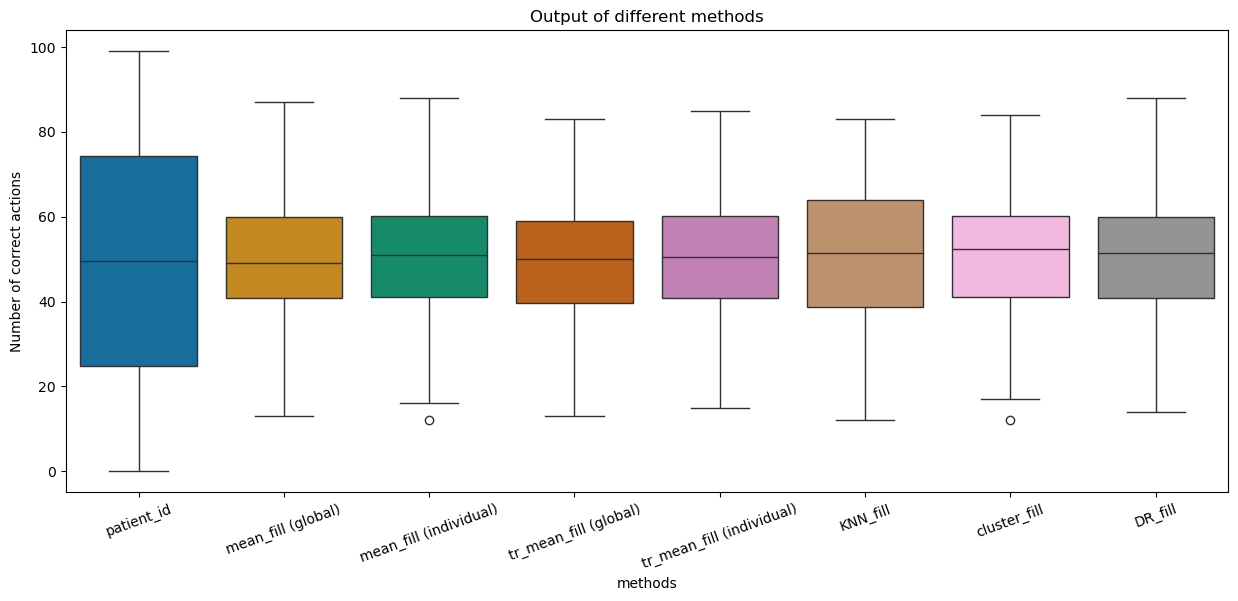

In [182]:
df_melted = result.melt(var_name='Columns', value_name='Values')

# Create a box plot with Seaborn
plt.figure(figsize=(15, 6))
sns.boxplot(x='Columns', y='Values', data=df_melted, hue='Columns', palette='colorblind')

# Add title and labels
plt.title('Output of different methods')
plt.xlabel('methods')
plt.xticks(rotation=20)
plt.ylabel('Number of correct actions')


plt.show()

In [175]:
history = filled_dt[filled_dt['patient_id'] == 0]

In [176]:
inference_model.update_posterior(history, 2)

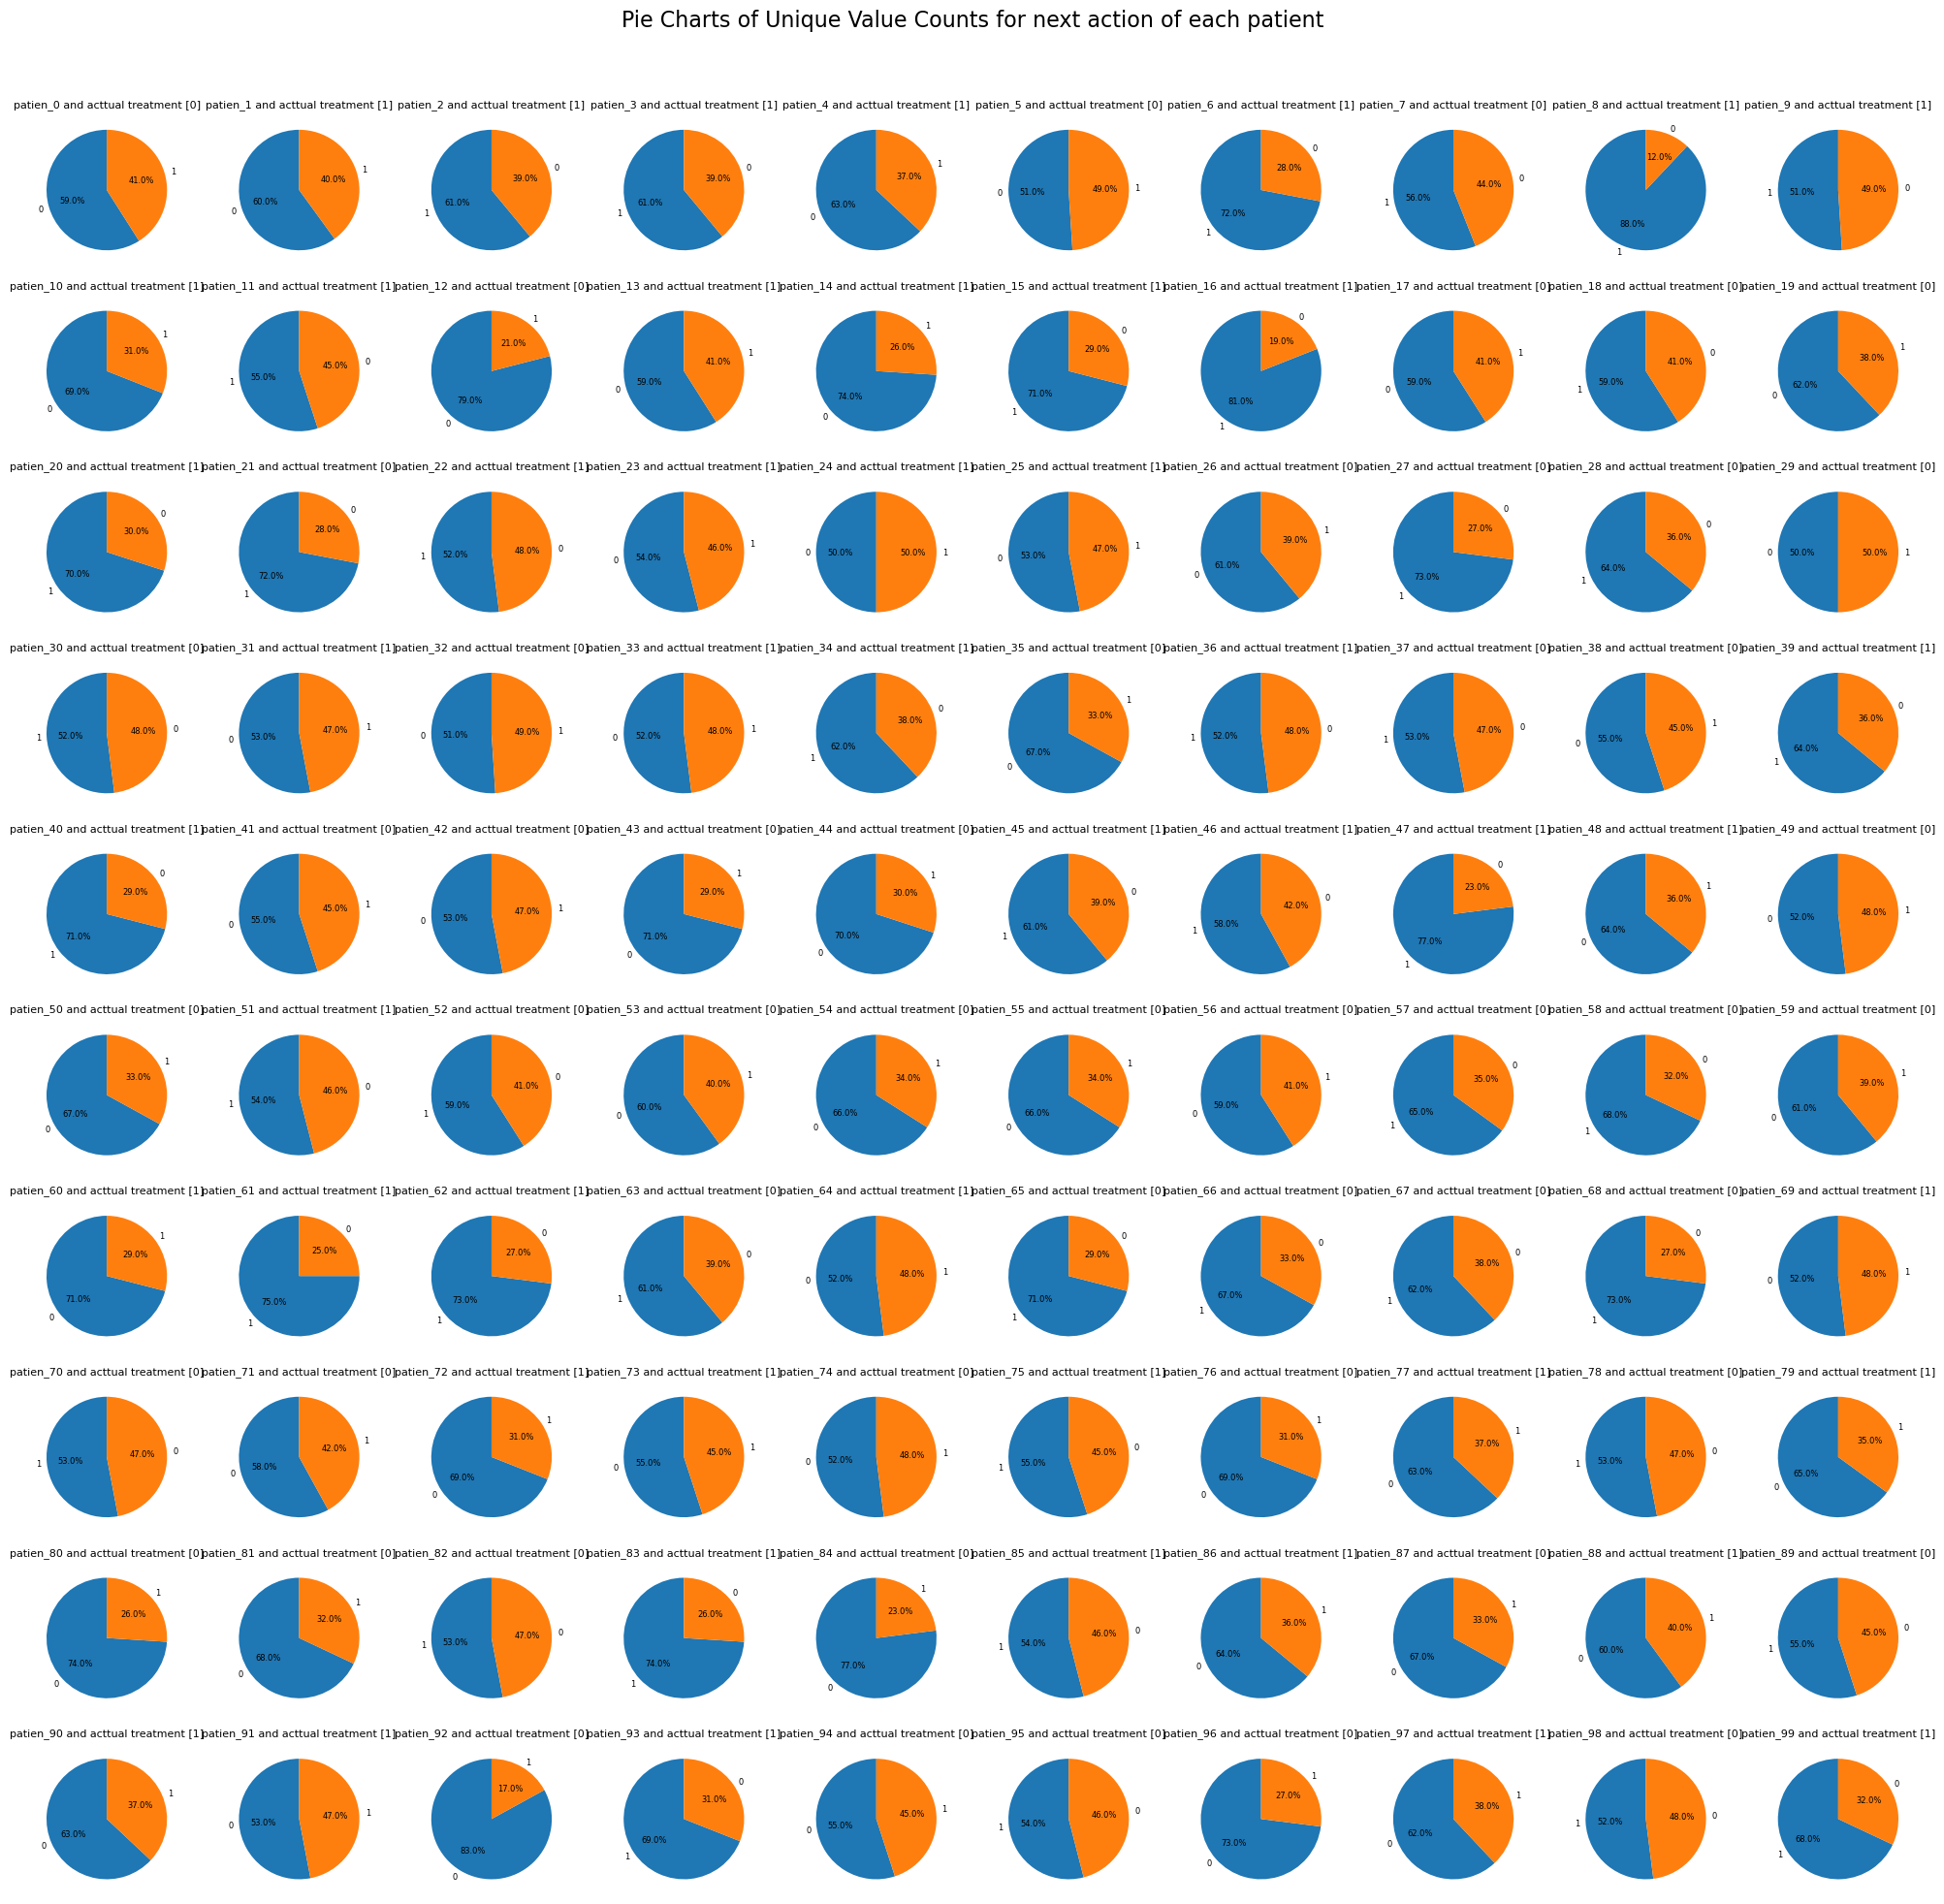

In [60]:
# Define grid size for subplots (10x10 for 100 columns)
n_columns = 10  
n_rows = 10 

# Create a figure and set of subplots
fig, axes = plt.subplots(n_rows, n_columns, figsize=(20, 20))  # Adjust size as needed
fig.suptitle('Pie Charts of Unique Value Counts for next action of each patient', fontsize=16)  

# Flatten axes for easier indexing
axes = axes.flatten()  
for i, column in enumerate(selection.columns):
    # Get unique value counts for the column
    value_counts = selection[column].value_counts()
    
    # Plot pie chart in the appropriate subplot
    value_counts.plot.pie(ax=axes[i], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 6})
    axes[i].set_ylabel('')  # Hide y-axis label for a cleaner look
    axes[i].set_title(f'{column} and acttual treatment {actual_tr[i]}', fontsize=8)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()